<hr style="border-top:5px solid Gold; margin-top: 2px; margin-bottom: 0px">
<hr style="border-top:5px solid Silver; margin-top: 0px; margin-bottom: 0px">
<hr style="border-top:5px solid #DC9233; margin-top: 0px; margin-bottom: 0px">

# Medals at the Olympics

<hr style="border-top:5px solid Gold; margin-top: 2px; margin-bottom: 0px">
<hr style="border-top:5px solid Silver; margin-top: 0px; margin-bottom: 0px">
<hr style="border-top:5px solid #DC9233; margin-top: 0px; margin-bottom: 0px">

In [1]:
# Standard imports
import pandas as pd

# Visulation Imports
import matplotlib.pyplot as plt
import seaborn as sns

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Modeling imports
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression, RFE
import sklearn.preprocessing
import statsmodels.api as sm
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# turn off pink boxes
import warnings
warnings.filterwarnings("ignore")

# Custom Imports
import wrangle

## Project Goal
- Create a classification model to predict if an olympic athlete will medal or not.

<hr style="border-top:5px solid Gold; margin-top: 2px; margin-bottom: 0px">
<hr style="border-top:5px solid Silver; margin-top: 0px; margin-bottom: 0px">
<hr style="border-top:5px solid #DC9233; margin-top: 0px; margin-bottom: 0px">

# Acquire and Prepare

<hr style="border-top:5px solid Gold; margin-top: 2px; margin-bottom: 0px">
<hr style="border-top:5px solid Silver; margin-top: 0px; margin-bottom: 0px">
<hr style="border-top:5px solid #DC9233; margin-top: 0px; margin-bottom: 0px">

#### This function reads 2 csv's and assigns them into a dataframe. It then feature engineers 5 new columns, those columns are Medal, Sex_Male, medalist, BMI, and AgeBins. From there it splits the data and imputes the null values for Age, drops data prior to the year 1961, and drops the remaining nulls.

In [2]:
df, df1, train, validate, test = wrangle.wrangle_df()

In [3]:
train.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Sex_Male,medalist,BMI,AgeBins
177199,89088,Michael Omondi,M,26.0,168.0,70.0,Kenya,KEN,1988 Summer,1988,Summer,Seoul,Hockey,Hockey Men's Hockey,None,1,0,11.2,20s
200426,100640,Hana n,F,19.0,157.0,40.0,Czechoslovakia,TCH,1988 Summer,1988,Summer,Seoul,Gymnastics,Gymnastics Women's Balance Beam,None,0,0,7.4,10s
264622,132418,Yan Wing-Shean,M,22.0,173.0,72.0,Chinese Taipei,TPE,1988 Summer,1988,Summer,Seoul,Fencing,"Fencing Men's Foil, Individual",None,1,0,10.9,20s
42842,22107,Beatrice Nicoleta Coad-Claru,F,16.0,170.0,64.0,Romania,ROU,1992 Summer,1992,Summer,Barcelona,Swimming,Swimming Women's 200 metres Breaststroke,None,0,0,10.0,10s
42612,21983,Arnaud Clment,M,30.0,172.0,72.0,France-2,FRA,2008 Summer,2008,Summer,Beijing,Tennis,Tennis Men's Doubles,None,1,0,11.0,30s


## Acquire and Prepare Takeaways

- 

<hr style="border-top:5px solid Gold; margin-top: 2px; margin-bottom: 0px">
<hr style="border-top:5px solid Silver; margin-top: 0px; margin-bottom: 0px">
<hr style="border-top:5px solid #DC9233; margin-top: 0px; margin-bottom: 0px">

# Exploration

<hr style="border-top:5px solid Gold; margin-top: 2px; margin-bottom: 0px">
<hr style="border-top:5px solid Silver; margin-top: 0px; margin-bottom: 0px">
<hr style="border-top:5px solid #DC9233; margin-top: 0px; margin-bottom: 0px">

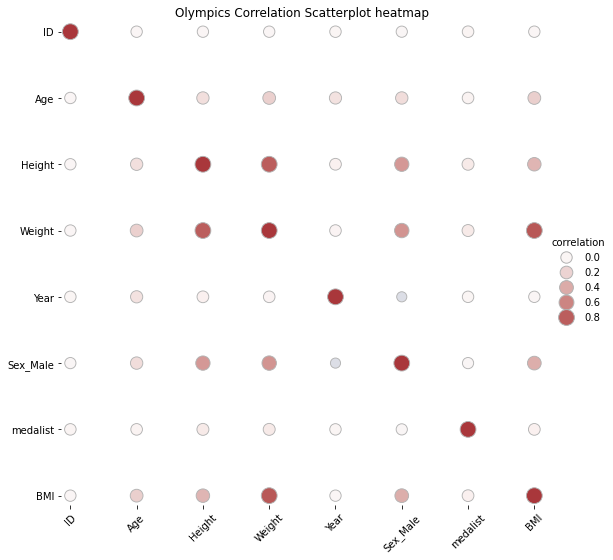

In [7]:
train_corr = train.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=train_corr,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=8, sizes=(100, 250), size_norm=(-.2, .8))
g.set(xlabel="", ylabel="", title='Olympics Correlation Scatterplot heatmap', aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(45)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")